In [1]:
import pandas as pd

# Veri analizi ve veri ön işleme

In [2]:
df = pd.read_csv("HousingData.csv")
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [5]:
# df.dtypes -> tipleri inceledik ve tüm tipler numerik

In [6]:
df.isnull().sum() # boş veri var mı?

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [ ]:
# Bütün boş verileri ortalama ile doldur.
df["CRIM"] = df["CRIM"].fillna(df["CRIM"].mean()) #CRIM alanındaki tüm boşlukları ortalama ile doldurur

In [7]:
df = df.fillna(df.mean()) # Bütün sütunları (boş) o sütunun ortalaması ile doldur.

In [8]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [9]:
!pip install scikit-learn

In [10]:
# Denetimli Öğrenme -> etiket ve diğer veriler

df.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.0


In [11]:
X = df.drop(columns=["MEDV"])
y = df["MEDV"]

In [14]:
print(f"x değeri: {X.head(1)}")
print(f"y değeri: {y[0]}")

x değeri:       CRIM    ZN  INDUS  CHAS    NOX     RM   AGE   DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.09    1  296     15.3   

       B  LSTAT  
0  396.9   4.98  
y değeri: 24.0


In [17]:
X.shape
# 506 veri -> TEST VERİSİ sağla.
# split -> 506 verinin %70ini eğitim için %30unu test için ayır.

(506, 13)

In [18]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
# Random Seed-State

In [43]:
X_train.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.210000
116,0.13158,0.0,10.01,0.0,0.547,6.176,72.5,2.7301,6,432,17.8,393.30,12.715432
45,0.17142,0.0,6.91,0.0,0.448,5.682,33.8,5.1004,3,233,17.9,396.90,10.210000
16,1.05393,0.0,8.14,0.0,0.538,5.935,29.3,4.4986,4,307,21.0,386.85,6.580000
468,15.57570,0.0,18.10,0.0,0.580,5.926,71.0,2.9084,24,666,20.2,368.74,18.130000


In [44]:
# Doğru algoritmayı seçerek bu algoritma için verileri sağlayıp modeli eğitme.

In [45]:
# Linear Regression
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [46]:
y_pred = model.predict(X_test)

In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [55]:
# MAE => Mean Absolute Error -> Ortalama mutlak sapma
mae = mean_absolute_error(y_test, y_pred)
mae

3.1410525671084324

In [56]:
# MSE => Mean Squared Error -> Ortalama sapma (ama sapmaların karesi alınarak)
mse = mean_squared_error(y_test, y_pred)
mse

21.818457953525854

In [ ]:
# 20 değerini tahmin eden 2 değer
#  25 tahmin -> 5 birim ceza -> 25 birim ceza
#  40 tahmin -> 20 birim ceza -> 400 birim ceza

In [57]:
import matplotlib.pyplot as plt

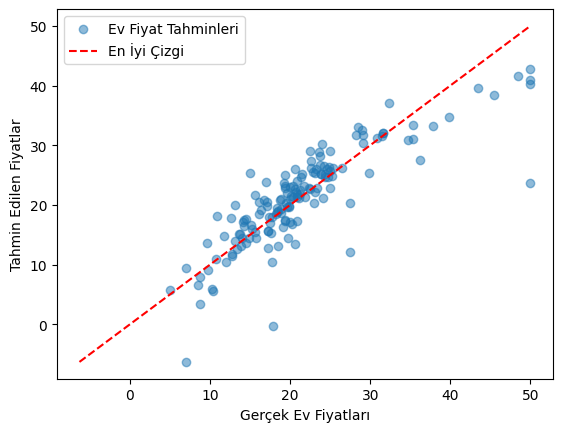

In [64]:
plt.scatter(y_test, y_pred, label="Ev Fiyat Tahminleri", alpha=0.5)
plt.xlabel("Gerçek Ev Fiyatları")
plt.ylabel("Tahmin Edilen Fiyatlar")

min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())

plt.plot([min_val, max_val], [min_val, max_val], color="red", linestyle="--",label="En İyi Çizgi")

plt.legend()

In [66]:
# Coef
coef_df = pd.DataFrame(model.coef_, X.columns, columns=["Katsayı"])
coef_df

# CRIM -> -0.12 -> - Ters orantı yani crim arttıkça fiyat azalır.
# ZN -> +0.03 -> + Düz orantı yani ZN arttıkça fiyat artar.

,Katsayı
CRIM,-0.128803
ZN,0.031913
INDUS,-0.010805
CHAS,3.689188
NOX,-13.963873
RM,4.418486
AGE,-0.026106
DIS,-1.432754
RAD,0.196898
TAX,-0.007219


In [67]:
X_test.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
173,0.09178,0.0,11.083992,0.0,0.51,6.416,68.518519,2.6463,5,296,16.6,395.5,9.04


In [68]:
import numpy as np

In [75]:
new_house_arr = np.array(
    [
        [3.50,	0.0,	11.083992,	0.0,	0.51,	6.416,	68.518519,	2.6463,	15,	296,	16.6,	395.5,	9.04]
    ]
)

In [76]:
model.predict(new_house_arr)

C:\Users\PC1\miniconda3\envs\my_env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([30.47683511])

In [77]:
feature_names = ["CRIM", "ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT" ]
new_house_df = pd.DataFrame(new_house_arr, columns=feature_names)
new_house_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,3.5,0.0,11.083992,0.0,0.51,6.416,68.518519,2.6463,15.0,296.0,16.6,395.5,9.04


In [ ]:
model.predict(new_house_arr)